In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import json
from json import JSONEncoder

# NOTE: librosa dependencies apparently require specific versions of numpy, try numpy==1.21.4
import librosa
import librosa.display

import IPython.display

In [2]:
# Data should be placed in the "large_data/" directory, which is not staged in the git repo
metadata = pd.read_csv('large_data/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata['length'] = metadata['end']-metadata['start']
metadata.info()
# metadata.describe()
display(metadata)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
 8   length           8732 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 614.1+ KB


,slice_file_name,fsID,start,end,salience,fold,classID,class,length
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,0.317551
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,4.000000
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,4.000000
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,4.000000
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,4.000000
...,...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn,4.000000
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn,2.142545
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn,3.505983
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn,2.532098


In [3]:
features = pd.read_csv('large_data/engineered_features_full1.csv', index_col=0)

In [4]:
features.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8732 entries, 0 to 8731
Columns: 360 entries, roll_32.y_mw_zcr to roll_128.logbands_mw_20.19
dtypes: float64(360)
memory usage: 24.0 MB


,roll_32.y_mw_zcr,roll_32.y_mw_power_mcr,roll_32.spec_flatness.mean,roll_32.spec_flatness.median,roll_32.spec_flatness.std,roll_32.spec_flatness.iqr,roll_32.spec_flatness.max,roll_32.spec_flatness.min,roll_32.spec_flatness_mw.mean,roll_32.spec_flatness_mw.median,...,roll_128.logbands_mw_20.10,roll_128.logbands_mw_20.11,roll_128.logbands_mw_20.12,roll_128.logbands_mw_20.13,roll_128.logbands_mw_20.14,roll_128.logbands_mw_20.15,roll_128.logbands_mw_20.16,roll_128.logbands_mw_20.17,roll_128.logbands_mw_20.18,roll_128.logbands_mw_20.19
0,0.135986,0.06250,0.007302,0.006863,0.003682,0.002932,0.021535,0.000738,0.007529,0.006886,...,0.959228,0.956011,0.919508,0.901375,0.847516,0.760590,0.618048,0.434596,0.256670,0.0
1,0.194580,0.18750,0.011270,0.009636,0.006746,0.007716,0.054017,0.001534,0.009449,0.008758,...,0.957209,0.953224,0.930364,0.903451,0.876376,0.834565,0.748861,0.540045,0.328423,0.0
2,0.096436,0.37500,0.008501,0.007698,0.004740,0.005425,0.047758,0.001180,0.005622,0.005595,...,0.955252,0.962662,0.930562,0.892188,0.839806,0.793814,0.700622,0.483725,0.279222,0.0
3,0.184814,0.12500,0.020530,0.012416,0.025892,0.013284,0.175634,0.001876,0.082451,0.094452,...,0.956989,0.945573,0.914709,0.901231,0.852738,0.810400,0.728246,0.515547,0.349556,0.0
4,0.130859,0.37500,0.009634,0.008831,0.004951,0.005842,0.045587,0.001646,0.009653,0.009022,...,0.954739,0.950009,0.924492,0.908894,0.875890,0.816016,0.755140,0.531249,0.293928,0.0
5,0.051514,0.37500,0.008061,0.006077,0.006143,0.006822,0.038134,0.000918,0.006110,0.005846,...,0.952931,0.948540,0.920655,0.896982,0.853180,0.800417,0.709674,0.515562,0.305050,0.0
6,0.102783,0.12500,0.008983,0.007123,0.008071,0.006553,0.078279,0.000879,0.016830,0.012745,...,0.953328,0.944303,0.914870,0.888127,0.853522,0.803973,0.729147,0.543208,0.311699,0.0
7,0.103516,0.34375,0.009936,0.008299,0.006241,0.006973,0.038030,0.001426,0.009519,0.008668,...,0.958940,0.956656,0.933722,0.900736,0.854133,0.809528,0.736256,0.566353,0.332160,0.0
8,0.071777,0.25000,0.004801,0.003790,0.004359,0.003455,0.078768,0.000720,0.007087,0.005585,...,0.962004,0.959466,0.932142,0.907581,0.872599,0.828367,0.770579,0.579573,0.323232,0.0
9,0.155762,0.06250,0.027538,0.015631,0.092947,0.015798,1.000001,0.002485,0.026375,0.026257,...,0.965686,0.947917,0.916963,0.880936,0.829858,0.737177,0.635401,0.512120,0.342714,0.0


In [5]:
features_f0 = pd.read_csv('large_data/engineered_features_f0_full1.csv', index_col=0)

In [6]:
features_f0.info()
features_f0.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8732 entries, 0 to 8731
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   range_low.f0_signal            8732 non-null   float64
 1   range_high.f0_stats.f0_mean    6372 non-null   float64
 2   range_high.f0_stats.f0_median  6372 non-null   float64
 3   range_high.f0_stats.f0_std     6372 non-null   float64
 4   range_high.f0_stats.f0_iqr     6372 non-null   float64
 5   range_high.f0_stats.f0_max     6372 non-null   float64
 6   range_high.f0_stats.f0_min     6372 non-null   float64
 7   range_high.f0_signal           8732 non-null   float64
 8   range_low.f0_stats.f0_mean     6153 non-null   float64
 9   range_low.f0_stats.f0_median   6153 non-null   float64
 10  range_low.f0_stats.f0_std      6153 non-null   float64
 11  range_low.f0_stats.f0_iqr      6153 non-null   float64
 12  range_low.f0_stats.f0_max      6153 non-null   f

,range_low.f0_signal,range_high.f0_stats.f0_mean,range_high.f0_stats.f0_median,range_high.f0_stats.f0_std,range_high.f0_stats.f0_iqr,range_high.f0_stats.f0_max,range_high.f0_stats.f0_min,range_high.f0_signal,range_low.f0_stats.f0_mean,range_low.f0_stats.f0_median,range_low.f0_stats.f0_std,range_low.f0_stats.f0_iqr,range_low.f0_stats.f0_max,range_low.f0_stats.f0_min
0,0.000000,551.190730,552.768807,4.497652,7.156487,557.576667,544.841599,0.571429,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,2279.768303,2282.437616,170.241756,328.066133,2517.936841,2080.949703,0.109827,NaN,NaN,NaN,NaN,NaN,NaN
2,0.080925,1761.847747,1941.594727,405.183075,850.982713,2230.306669,1077.167118,0.294798,1128.712229,1115.153334,36.960305,57.225801,1195.191751,1077.167118
3,0.000000,552.046160,523.251131,41.031176,53.988435,666.915289,523.251131,0.260116,NaN,NaN,NaN,NaN,NaN,NaN
4,0.040462,2128.539240,2129.589597,36.620152,49.205062,2191.991335,2057.047957,0.156069,66.850514,65.785287,1.875716,1.731598,70.915367,65.406391
5,0.549133,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,71.664066,68.499729,6.619412,11.996459,87.307058,65.406391
6,0.127168,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,66.324975,65.406391,1.633327,0.952187,71.326176,65.406391
7,0.566474,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,73.038573,70.100835,7.721365,12.181207,98.566561,65.406391
8,0.843931,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,70.221166,66.549675,7.497901,6.748554,103.228180,65.406391
9,0.000000,703.347267,702.514299,21.894254,26.279199,744.275557,674.664472,0.285714,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
features_all = pd.concat([metadata, features, features_f0], axis=1)
features_all.info()
features_all.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Columns: 383 entries, slice_file_name to range_low.f0_stats.f0_min
dtypes: float64(377), int64(4), object(2)
memory usage: 25.5+ MB


,slice_file_name,fsID,start,end,salience,fold,classID,class,length,roll_32.y_mw_zcr,...,range_high.f0_stats.f0_iqr,range_high.f0_stats.f0_max,range_high.f0_stats.f0_min,range_high.f0_signal,range_low.f0_stats.f0_mean,range_low.f0_stats.f0_median,range_low.f0_stats.f0_std,range_low.f0_stats.f0_iqr,range_low.f0_stats.f0_max,range_low.f0_stats.f0_min
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark,0.317551,0.135986,...,7.156487,557.576667,544.841599,0.571429,NaN,NaN,NaN,NaN,NaN,NaN
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing,4.000000,0.194580,...,328.066133,2517.936841,2080.949703,0.109827,NaN,NaN,NaN,NaN,NaN,NaN
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing,4.000000,0.096436,...,850.982713,2230.306669,1077.167118,0.294798,1128.712229,1115.153334,36.960305,57.225801,1195.191751,1077.167118
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing,4.000000,0.184814,...,53.988435,666.915289,523.251131,0.260116,NaN,NaN,NaN,NaN,NaN,NaN
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing,4.000000,0.130859,...,49.205062,2191.991335,2057.047957,0.156069,66.850514,65.785287,1.875716,1.731598,70.915367,65.406391


In [17]:
column_names = list(features_all)
for c in column_names:
    print(c)

slice_file_name
fsID
start
end
salience
fold
classID
class
length
roll_32.y_mw_zcr
roll_32.y_mw_power_mcr
roll_32.spec_flatness.mean
roll_32.spec_flatness.median
roll_32.spec_flatness.std
roll_32.spec_flatness.iqr
roll_32.spec_flatness.max
roll_32.spec_flatness.min
roll_32.spec_flatness_mw.mean
roll_32.spec_flatness_mw.median
roll_32.spec_flatness_mw.std
roll_32.spec_flatness_mw.iqr
roll_32.spec_flatness_mw.max
roll_32.spec_flatness_mw.min
roll_32.spec_centroid.mean
roll_32.spec_centroid.median
roll_32.spec_centroid.std
roll_32.spec_centroid.iqr
roll_32.spec_centroid.max
roll_32.spec_centroid.min
roll_32.spec_centroid_mw.mean
roll_32.spec_centroid_mw.median
roll_32.spec_centroid_mw.std
roll_32.spec_centroid_mw.iqr
roll_32.spec_centroid_mw.max
roll_32.spec_centroid_mw.min
roll_32.spec_bandwidth.mean
roll_32.spec_bandwidth.median
roll_32.spec_bandwidth.std
roll_32.spec_bandwidth.iqr
roll_32.spec_bandwidth.max
roll_32.spec_bandwidth.min
roll_32.spec_bandwidth_mw.mean
roll_32.spec_bandwidt

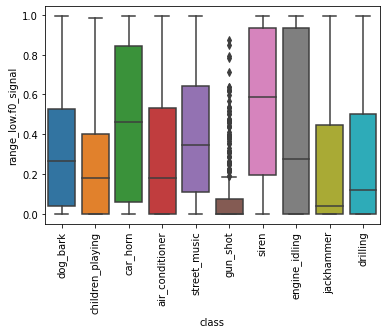

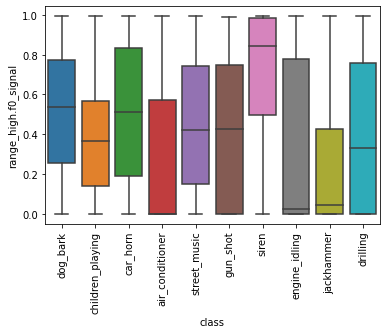

In [27]:
seaborn.boxplot(data=features_all, x='class', y='range_low.f0_signal')
plt.xticks(rotation=90)
plt.show()
seaborn.boxplot(data=features_all, x='class', y='range_high.f0_signal')
plt.xticks(rotation=90)
plt.show()

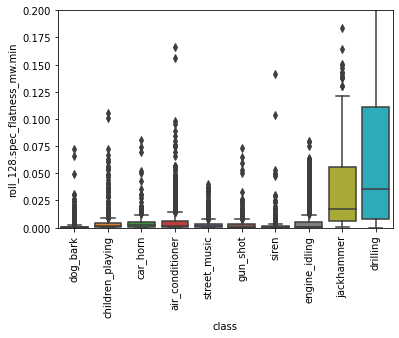

In [107]:
seaborn.boxplot(data=features_all, x='class', y='roll_128.spec_flatness_mw.min')
plt.ylim([0,.2])
plt.xticks(rotation=90)
plt.show()

In [26]:
tmp = features_all.groupby('class').mean()
tmp.info()
tmp['range_high.f0_signal']

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, air_conditioner to street_music
Columns: 381 entries, fsID to range_low.f0_stats.f0_min
dtypes: float64(381)
memory usage: 29.8+ KB


class
air_conditioner     0.264102
car_horn            0.504599
children_playing    0.371289
dog_bark            0.508044
drilling            0.397746
engine_idling       0.329655
gun_shot            0.410536
jackhammer          0.245598
siren               0.709041
street_music        0.443942
Name: range_high.f0_signal, dtype: float64